In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#avoid warnings
import warnings
warnings.filterwarnings("ignore")

#import libiary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn import datasets

#save model
import joblib

dataset link: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

In [2]:
#import dataset

dataset = pd.read_csv(r"D:\MACHINE LEARNING\FINAL PROJECT\Dataset\finance\loan.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
#information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
dataset["Gender"] = dataset["Gender"].fillna(dataset['Gender'].mode()[0])
dataset['Self_Employed'] =dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])
dataset['Loan_Amount_Term'] =dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean())
dataset['Credit_History'] =dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0])
dataset['LoanAmount'] =dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())
dataset['Dependents'] =dataset['Dependents'].fillna(dataset['LoanAmount'].mode()[0])
dataset['Married'] =dataset['Married'].fillna(dataset['Married'].mode()[0])

In [8]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
dataset["Credit_History"].unique()

array([1., 0.])

In [10]:
dataset["Gender"] = dataset["Gender"].replace(to_replace={'Male':1,"Female":0}).astype("int")
dataset['Self_Employed'] =dataset['Self_Employed'].replace(to_replace={'Yes':1,"No":0}).astype("int")
dataset['Dependents'] =dataset['Dependents'].replace(to_replace={"3+":4}).astype("int")
dataset['Married'] =dataset['Married'].replace(to_replace={'Yes':1,"No":0}).astype("int")
dataset['Education'] =dataset['Education'].replace(to_replace={'Graduate':1,"Not Graduate":0}).astype("int")
dataset['Loan_Status'] =dataset['Loan_Status'].replace(to_replace={'Y':1,"N":0}).astype("int")
dataset['Property_Area'] =dataset['Property_Area'].replace(to_replace={'Urban':1,"Semiurban":0,"Rural":2}).astype("int")

In [11]:
dataset.drop("Loan_ID",axis=1,inplace=True)

In [12]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


Number of give Loan: 422
Number of not give loan: 192


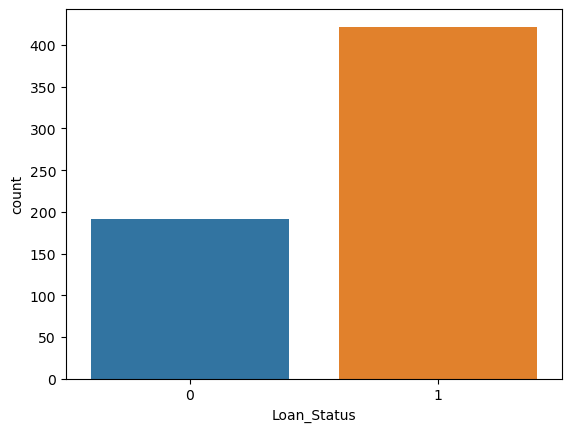

In [13]:
ax = sns.countplot(dataset["Loan_Status"])
L,NL = dataset["Loan_Status"].value_counts()   
print("Number of give Loan: {}".format(L))
print("Number of not give loan: {}".format(NL))

In [14]:
x = dataset.drop('Loan_Status',axis=1)
y = dataset['Loan_Status']


In [15]:
#Feature Scaling

cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'] 

Scaler = StandardScaler()
x[cols]=Scaler.fit_transform(x[cols])
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.072991,-0.554487,0.000000,0.279851,1.0,1
1,1,1,1,1,0,-0.134412,-0.038732,-0.219273,0.279851,1.0,2
2,1,1,0,1,1,-0.393747,-0.554487,-0.957641,0.279851,1.0,1
3,1,1,0,0,0,-0.462062,0.251980,-0.314547,0.279851,1.0,1
4,1,0,0,1,0,0.097728,-0.554487,-0.064454,0.279851,1.0,1


In [16]:
#split training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,stratify=y,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(x_train,y_train)

x_train_pred = model1.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model1.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  79.48717948717949
Accuracy on Testing data:  84.86486486486487

              precision    recall  f1-score   support

           0       0.92      0.57      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.87      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [18]:
from sklearn.svm import SVC

model2=SVC(kernel="linear")

model2.fit(x_train,y_train)

x_train_pred = model2.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model2.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  79.25407925407926
Accuracy on Testing data:  84.86486486486487

              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185



In [19]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=5,
 max_features='sqrt',
 max_depth=5)

model3.fit(x_train,y_train)

x_train_pred = model3.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model3.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  82.98368298368298
Accuracy on Testing data:  81.08108108108108

              precision    recall  f1-score   support

           0       0.79      0.53      0.64        58
           1       0.82      0.94      0.87       127

    accuracy                           0.81       185
   macro avg       0.80      0.74      0.76       185
weighted avg       0.81      0.81      0.80       185



In [20]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()

model4.fit(x_train,y_train)

x_train_pred = model4.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model4.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  77.15617715617715
Accuracy on Testing data:  83.24324324324324

              precision    recall  f1-score   support

           0       0.81      0.60      0.69        58
           1       0.84      0.94      0.88       127

    accuracy                           0.83       185
   macro avg       0.83      0.77      0.79       185
weighted avg       0.83      0.83      0.82       185



compare other,Random Classifier  get good accuracy both test and train

In [21]:
#predication


#input_Data = [1,1,2,0,0,2889,0.0,45,180,0,1]   #0
input_Data = [1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1]         #1
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

#std  = Scaler.transform(input_Data_reshaped)

predication = model3.predict(input_Data_reshaped)

print(predication)

if predication==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

[1]
Loan Approved


In [22]:
#save the model

#location => D:\MACHINE LEARNING\FINAL PROJECT\Models\finance

import joblib

joblib.dump(model1,r"D:\MACHINE LEARNING\FINAL PROJECT\Models\finance\Loan_model.pkl")

['D:\\MACHINE LEARNING\\FINAL PROJECT\\Models\\finance\\Loan_model.pkl']

In [23]:
#load model

load_model = joblib.load(r"D:\MACHINE LEARNING\FINAL PROJECT\Models\finance\Loan_model.pkl")



#predication
#input_Data = [1,1,2,0,0,2889,0.0,45,180,0,1]   #0
input_Data = [1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1]         #1
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

#std  = Scaler.transform(input_Data_reshaped)

predication = load_model.predict(input_Data_reshaped)

print(predication)

if predication==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

[1]
Loan Approved
